In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
S1 ="Imagination is more important than knowledge."
S2 ="The secret to creativity is knowing how to hide your sources."

S1="AGCTAGCTAGCATGAG"
S2="AGCTAGCAGTACGAGC"
N, M= len(S1) , len(S2)
BM = M+N

In [3]:
connect = {}
for i in range(N):
    for j in range(M):
        if S1[i]==S2[j] and S2[j]!=' ':
            connect[i+1,j+1] = S1[i]

In [4]:
A, B = [] , [] 
for (i,j) in connect:
    A.append(i)
    B.append(j)

In [5]:
model = AbstractModel()
model.i = RangeSet(N)
model.ii = Set(initialize=model.i)

model.j = RangeSet(M)
model.x = Var (model.i, model.j, within=Binary ) 
def rule_C1(model, i):
    if i in A:
        return sum(model.x[i,j] for j in model.j if (i,j) in connect)<= 1 
    else:
        return Constraint.Skip
model.C1 = Constraint(model.i, rule = rule_C1)

def rule_C2(model, j):
    if j in B:
        return sum(model.x[i,j] for i in model.i if (i,j) in connect)<= 1 
    else:
        return Constraint.Skip
model.C2 = Constraint(model.j, rule = rule_C2)

def rule_C3(model, i,ii):
    if i in A and ii in A and ii>i:
        return sum(j*model.x[i,j] for j in model.j if (i,j) in connect)<= \
        sum(j*model.x[ii,j] for j in model.j if (ii,j) in connect) +BM*(1-sum(model.x[ii,j] for j in model.j if (ii,j) in connect) )
    else:
        return Constraint.Skip
model.C3 = Constraint(model.i, model.ii, rule = rule_C3)

def rule_OF(model):
    return sum(model.x[i,j] for (i,j) in connect) 
model.obj = Objective(rule= rule_OF, sense=maximize)

In [6]:
opt = SolverFactory('cbc')
instance = model.create_instance()

results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
    
print(value(instance.obj))

feasible
13.0


In [7]:
for (i,j) in connect:
    if value(instance.x[i,j]) >0:
        print((i,j),connect[i,j])

(1, 1) A
(2, 2) G
(3, 3) C
(4, 4) T
(5, 5) A
(6, 6) G
(7, 7) C
(9, 8) A
(10, 9) G
(13, 10) T
(14, 13) G
(15, 14) A
(16, 15) G


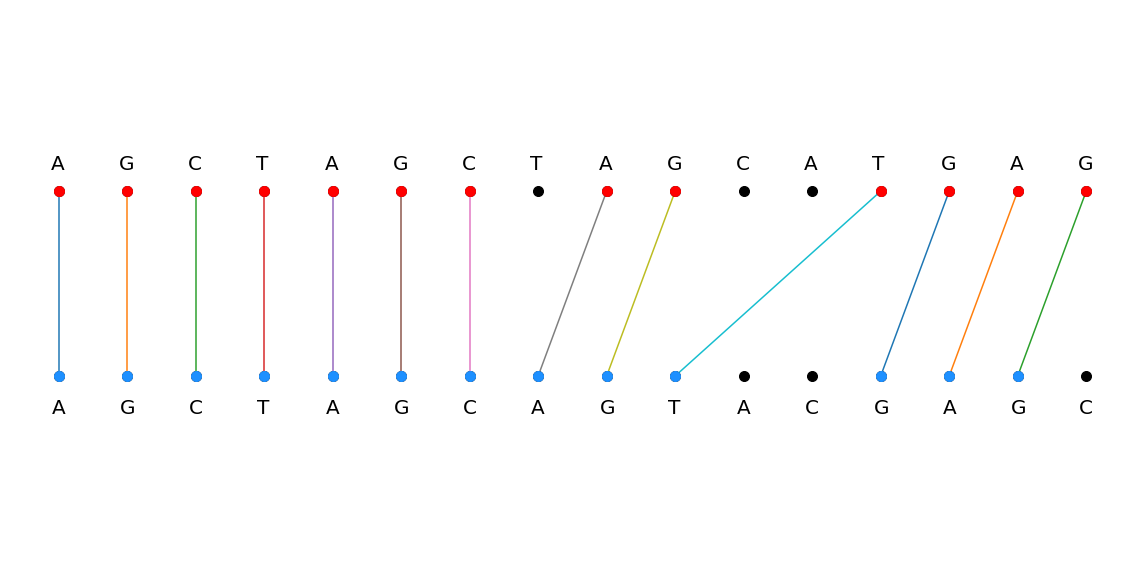

In [8]:
plt.figure(figsize=(16,8))
for i in range(N):
    plt.scatter(i,9.5, s=100,c='k')
    plt.text(i-0.12,9.5+0.06, s=S1[i], fontsize=20)
    
for j in range(M):
    plt.scatter(j,9, s=100,c='k')
    plt.text(j-0.1,9-0.1, s=S2[j], fontsize=20)
    
for (i,j) in connect:
    if value(instance.x[i,j]) >0:
        x1=i-1
        y1=9.5
        x2=j-1
        y2=9
        plt.plot([x1,x2],[y1,y2], zorder =-1)
        plt.scatter(x1,y1, s=100,c='r')
        plt.scatter(x2,y2, s=100,c='dodgerblue')
                
plt.ylim([8.5,10])
plt.axis('off')
plt.tight_layout()
plt.savefig('LCS .png', format='png', dpi=400)
